# Offensive Efficiency Ratio
***
By: Marissa Bueno

## 1.1  Explanation of Statistic

### Inspiration & Prior Research
As I began brainstorming ideas for this final project, I knew that I wanted to create a team statistic. Throughout this semester I have noticed that a lot of existing baseball statistics revolved around an individual's performance and lacked information on a whole team's performance. I felt as though team statistics have the potential to carry a lot of information and can prove to be benefical. However, all of that goes unnoticed by just focusing on individual players which is the trend for current statistics. Understanding how a team's offense and defense contributes to the overall success of a team is crucial. It's along the same idea of the age old saying, "***You are only as good as your team***". <br>

As a former basketball player & huge fan of the game, I became curious about existing basketball statistics. I began looking into some of those out of curiousity, and I stumbled upon an <a href="http://www.espn.com/nba/hollinger/teamstats">Offensive Efficiency</a> statistic. This statistic is the number of points a team scores per 100 possessions. I was curious if anything like this existed for baseball. I eventually found the <a href="http://m.mlb.com/glossary/advanced-stats/defensive-efficiency-ratio">Defensive Efficiency Ratio (DER)</a> statistic (_see below for an explanation_). I began searching for an offensive statistic that measured efficiency similar to the ones I had found for basketball and defense (DER), but eventually discovered that current statistics didn't cover this information. 
***
#### Defensive Efficiency Ratio
According to MLB, Defensive Efficiency Ratio (DER) is “a statistic used to evaluate team defense by finding out the rate of times batters reach base on balls put in play. Basically, for every ball hit into the field of play, how likely is the defense to convert that into an out?”
### My Statistic


#### Offensive Efficiency Ratio
In order to understand how a _team_ is performing offensively, I propose a closely related, but new statistic to DER that will evaluate the rate at which teams turn baserunners into runs. As a contrast to DER, Offensive Efficiency Ratio (OER) is basically, for every runner on base, how likely is it for the offense to convert that into a run. Getting on-base is the most crucial result of each plate appearance; and having more players on base should lead to more runs, so why not evaluate which teams are converting baserunners into runs the best. 
<br>

$$OER = \frac{PA * OBP}{R}$$
$
PA : \textrm{Plate Appearances}\\
OBP : \textrm{On Base Percentage}\\
R : \textrm{Runs}
$
***
_Note:_<br>
$
PA*OBP \approx \textrm{ baserunners }
$ <br>
By re-writing the above calculation in terms of _baserunners_ for OER, we get: <br>

$$OER = \frac{\textrm{baserunners}}{R}$$

This is ultimately finding the ratio between the number of baserunners over the total number of runs a team has. This calculation will tell us how well a team's offense is at converting. A low OER will indicate a better offensive efficiency, while a higher OER will indicate that a team is producing less runs even with a higher number of baserunners.
<br>
### What Data I Plan On Using
I plan on using Lahman for my main source of data. This will allow me to access each teams PA, OBP, and R to calculate OER. I will also have access to other statistics like Batting Average, Runs Created, and Wins which will be used to evaluate OER. Performing these evaluations will allow me to analyze how accurate of an indicator OER depicts a team's offensive abilities is. In the end, I will use a combination of OER and DER to analyze each team's overall performance. 



***
## 1.2  Demonstration & 1.3 Evaluation


In [1]:
from pybaseball.lahman import *
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
import seaborn as sns
import statsmodels.api as sm 
%matplotlib inline

#data
download_lahman()
teams = teams()

/Users/missybueno/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Necessary Data
Such as: PA, OBP, R, BA, RC, W, DER

In [13]:
# 2016 data only
teams2016 = teams.loc[teams['yearID']==2016].copy()

################################################################

# Calculate PA, OBP, BA, baserunners (apprx), and OER 
teams2016['PA'] = teams2016['AB']+teams2016['BB']+teams2016['HBP']+teams2016['SF']#+teams2016['SH']
teams2016['OBP'] = (teams2016['H']+teams2016['BB']+teams2016['HBP'])/(teams2016['AB']+teams2016['BB']+teams2016['SF'])
teams2016['OER'] = (teams2016['PA']+teams2016['OBP'])/teams2016['R']
teams2016['BA'] = teams2016['H']/teams2016['AB']
teams2016['baserunners'] = teams2016['PA']*teams2016['OBP']
teams2016['TB'] = (teams2016['H']-teams2016['2B']-teams2016['3B'])+(2*teams2016['2B'])+(3*teams2016['3B'])+(4*teams2016['HR'])
teams2016['RC'] = ((teams2016['TB']*(teams2016['H']+teams2016['BB'])))/(teams2016['AB']+teams2016['BB'])
teams2016['DER'] = 1 - ((teams2016['H']-teams2016['HR'])/(teams2016['PA']-teams2016['BB']-teams2016['SO']-teams2016['HBP']-teams2016['HR']))
################################################################

# Gather everything & sort
teams2016 = teams2016[['teamID', 'OER','BA','W','PA','OBP', 'baserunners', 'R','RC', 'DER']].sort_values('OER', ascending=True).reset_index()
teams2016

,index,teamID,OER,BA,W,PA,OBP,baserunners,R,RC,DER
0,2808,BOS,7.188327,0.281834,93,6311.0,0.350830,2214.085673,878,977.262042,0.679871
1,2813,COL,7.316377,0.275027,75,6182.0,0.338326,2091.533051,845,924.907662,0.674283
2,2810,CHN,7.787560,0.256042,103,6292.0,0.348773,2194.482247,808,857.650593,0.697651
3,2812,CLE,7.882023,0.261670,94,6124.0,0.331687,2031.252675,777,830.524688,0.696086
4,2832,TEX,7.936373,0.261719,95,6071.0,0.325279,1974.769538,765,823.710451,0.701937
5,2830,SLN,7.940088,0.255047,86,6185.0,0.328863,2034.020442,779,855.778400,0.705882
6,2834,WAS,8.064651,0.255556,95,6153.0,0.328954,2024.053046,763,817.623465,0.707174
7,2828,SEA,8.075951,0.259001,86,6202.0,0.330179,2047.772920,768,840.876334,0.702650
8,2814,DET,8.147112,0.267101,86,6110.0,0.333829,2039.692917,750,861.008141,0.687654
9,2807,BAL,8.161720,0.255793,89,6072.0,0.319343,1939.051095,744,848.207944,0.708762


_A dataframe ranking MLB teams by Offensive Efficiency Ratio (OER)._
***
## MLB Team Comparisons

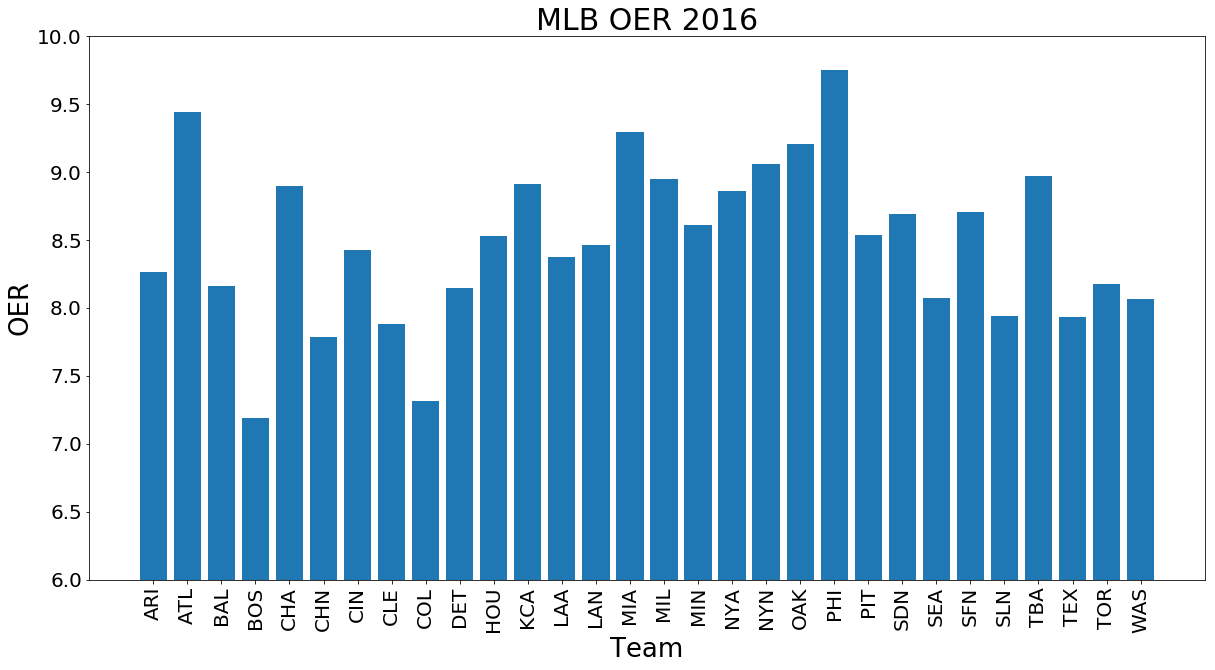

In [46]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
plt.title("MLB OER 2016", fontsize=30)
plt.bar(teams2016['index'], teams2016['OER']) #, tick_label=teams2016['teamID'])
plt.xticks(teams2016['index'], teams2016['teamID'], rotation='vertical')
ax.tick_params(labelsize=20)
plt.ylabel('OER', fontsize=26)
plt.xlabel('Team', fontsize=26)
plt.ylim([6, 10])
plt.show()

_A bar graph showing MLB teams by Offensive Efficiency Ratio (OER)._ <br>
_**note**: the lower the OER, the more efficient._

***

## OER vs Current Statistic Comparisons
### OER vs BA
#### Line of Best Fit
Before we inspect how well OER is at evaluating a team's offensive performance, we first must see how this statistic holds up to existing statistics. The first statistic we will compare to OER is one of the most recognizable offensive statistics: batting average. Although BA may not capture the whole picture of a team's offense, I think it would be interesting to just see how it compares since it is one of the most recognizable statistics of the game.<br> _See below._

Regression Results
P-Value:  0.000112729001922
Slope:  -0.00556301979865
Intercept:  0.345562505768
R-Squared:  0.418224545209
Standard Error:  0.00237141825686


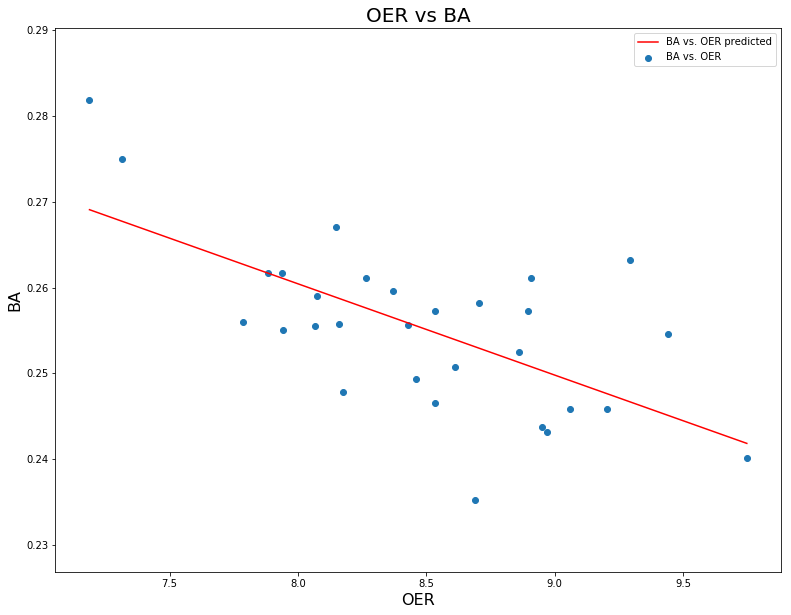

In [81]:
m, b, rval, pval, stderr = stats.linregress(teams2016['OER'], teams2016['BA'])
y = m * teams2016['OER'].copy() + b
x = teams2016['OER'].copy()


fig, ax = plt.subplots()
fig.set_size_inches(13, 10)
scatter = ax.scatter(x,teams2016['BA'],marker='o',label="BA vs. OER")
line = ax.plot(x,y, color='red',label="BA vs. OER predicted")
ax.set_xlabel("OER", fontsize=16)
ax.set_ylabel("BA", fontsize=16)
plt.title("OER vs BA", fontsize=20)
plt.legend()
print('Regression Results')
print('============================')
print('P-Value: ', pval)
print('Slope: ', slope)
print('Intercept: ', b)
print('R-Squared: ', rval**2)
print('Standard Error: ', stderr)
print('============================')


In [83]:
teams2016[['BA', 'OER']].corr(method='pearson')

,BA,OER
BA,1.000000,-0.646703
OER,-0.646703,1.000000


### OER vs RC
#### Line of Best Fit
The next statistic wel will compare is one that is most closely releated to OER, Runs Created (RC). RC estimates a player's offensive contribution in terms of total runs. It combines a player's ability to get on base with his ability to hit for extra bases. Then it divides those two by the player's total opportunities. As mentioned above, this is a meaningful comparison as it provides us assurance that our proposed statistic is actual holds purposeful information.  <br> _See below._

Regression Results
P-Value:  1.91294060857e-11
Slope:  -0.00556301979865
Intercept:  1675.37380508
R-Squared:  0.804902164464
Standard Error:  9.69022984925


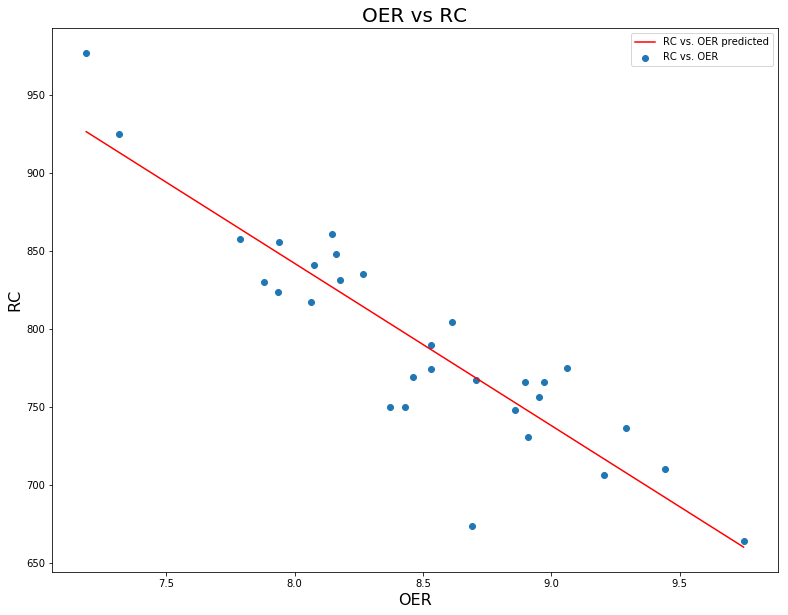

In [97]:
m, b, rval, pval, stderr = stats.linregress(teams2016['OER'], teams2016['RC'])
y = m * teams2016['OER'].copy() + b
x = teams2016['OER'].copy()


fig, ax = plt.subplots()
fig.set_size_inches(13, 10)
scatter = ax.scatter(x,teams2016['RC'],marker='o',label="RC vs. OER")
line = ax.plot(x,y, color='red',label="RC vs. OER predicted")
ax.set_xlabel("OER", fontsize=16)
ax.set_ylabel("RC", fontsize=16)
plt.title("OER vs RC", fontsize=20)
plt.legend()
print('Regression Results')
print('============================')
print('P-Value: ', pval)
print('Slope: ', slope)
print('Intercept: ', b)
print('R-Squared: ', rval**2)
print('Standard Error: ', stderr)
print('============================')


In [98]:
teams2016[['RC', 'OER']].corr(method='pearson')

,RC,OER
RC,1.000000,-0.897163
OER,-0.897163,1.000000


### OER vs W
#### Line of Best Fit
In order to understand how a _team's_ offense is contributing to their winning, we present an evaluation on OER and W.<br> _See below._

Regression Results
P-Value:  0.00217850727343
Slope:  -0.00556301979865
Intercept:  162.698029655
R-Squared:  0.28916885099
Standard Error:  2.8557731866


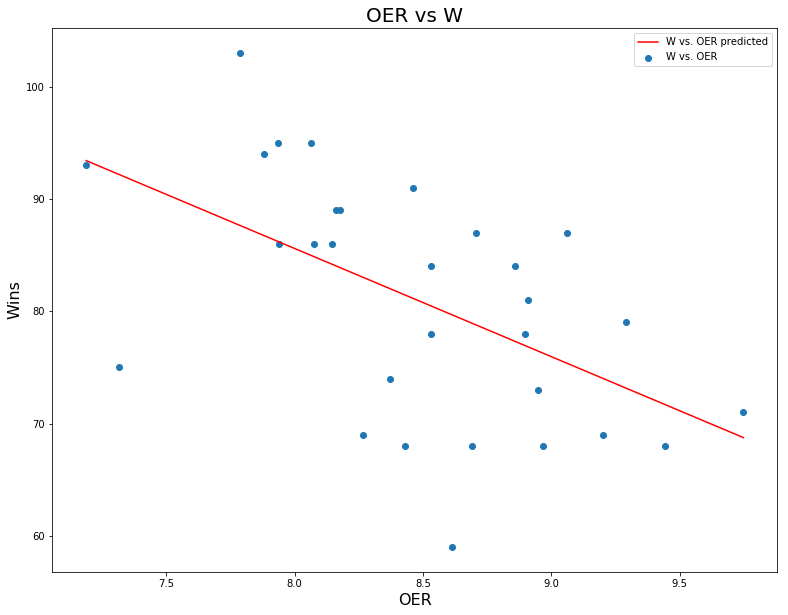

In [80]:
m, b, rval, pval, stderr = stats.linregress(teams2016['OER'], teams2016['W'])
y = m * teams2016['OER'].copy() + b
x = teams2016['OER'].copy()


fig, ax = plt.subplots()
fig.set_size_inches(13, 10)
scatter = ax.scatter(x,teams2016['W'],marker='o',label="W vs. OER")
line = ax.plot(x,y, color='red',label="W vs. OER predicted")
ax.set_xlabel("OER", fontsize=16)
ax.set_ylabel("Wins", fontsize=16)
plt.title("OER vs W", fontsize=20)
plt.legend()
print('Regression Results')
print('============================')
print('P-Value: ', pval)
print('Slope: ', slope)
print('Intercept: ', b)
print('R-Squared: ', rval**2)
print('Standard Error: ', stderr)
print('============================')


#### Correlation

In [99]:
teams2016[['W', 'OER']].corr(method='pearson')

,W,OER
W,1.000000,-0.537744
OER,-0.537744,1.000000


### Explanation: OER vs Current Statistic Comparisons
The comparisons performed above give us an idea of how meaningful the data OER could potentially provide. Three comparisons were done: Batting Average, Runs Created, and Wins. The R-Squared values & Correlation values from those comparisons are shown in the table below. <br><br>

|  | R-Squared | Correlation | 
|--------------|--------| --------
| Batting Average           | 0.418224545209   | -0.646703
| Runs Created            | 0.804902164464    | -0.897163
| Wins           | 0.28916885099    | -0.537744

<br>

We see that there is a relationship for all three of the statistics that were compared to OER. We began our evaluation by comparing OER to batting average. Batting average is the most well-known offensive statistics. Although BA isn't the most useful statistic to analyze a team's offense, it is built into the language of the sport & worthwhile to explore. This statistic fell right into the middle of all three of our comparison - we see that there is a relationship between OER & BA by looking at the R-Squared value & Correlation value, however, this relationship is not very strong. It is note worthy to mention that the values found through the comparisons should analyzed with human behavior in mind. It is hard to test correlation when humans are involved & all of the outcomes found in these tests are actually reasonable. After batting average, we compared OER to runs created. Runs created measures how well a hitter creates runs. Although it is measuring slightly different events than OER, it is the most similar statistic that currently exists and can provide us meaningful information. We see that this statistic has the highest R-Squared and Correlation values. This leads us to believe that our statistic is giving a reasonable & relatively accurate depiction on a team's offensive efficiency. The final comparison done is against wins. Although we are completely ignoring half of what wins games, defense, it is again worthwhile to see how closely OER relates to wins. We see the weakest relationship with wins after performing the tests. This is entirely too surprising since we are aren't giving any attention to how a team's defense is performing.  
<br>
***
## Incorporating DER

If we want to get the entire picture on how a team is performing overall, we must look at offensive _and_ defensive. 

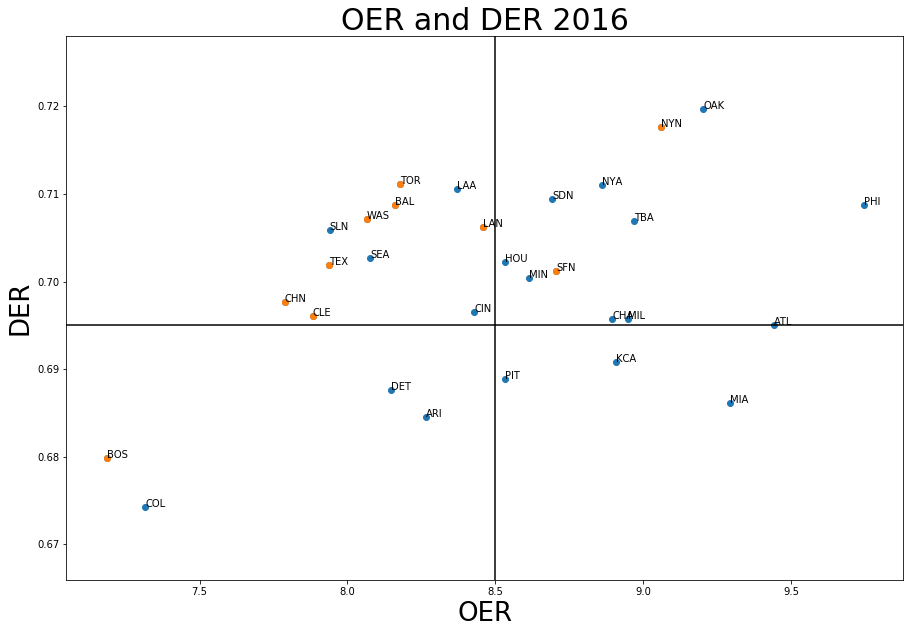

In [42]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
plt.title("OER and DER 2016", fontsize=30)

playoffs = teams2016.loc[(teams2016['teamID']=='CHN')|(teams2016['teamID']=='CLE')|(teams2016['teamID']=='TOR')|
                         (teams2016['teamID']=='LAN')|(teams2016['teamID']=='LAN')|(teams2016['teamID']=='TEX')|
                         (teams2016['teamID']=='BOS')|(teams2016['teamID']=='SFN')|(teams2016['teamID']=='WAS')|
                         (teams2016['teamID']=='NYN')|(teams2016['teamID']=='BAL')]

plt.scatter(teams2016['OER'], teams2016['DER'])
y = teams2016['DER']
z = teams2016['OER']
n = teams2016['teamID']
for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))


plt.scatter(playoffs['OER'], playoffs['DER'])
plt.axhline(y=0.695, color='black', linestyle='-')
plt.axvline(x=8.5, color='black')

plt.ylabel('DER', fontsize=26)
plt.xlabel('OER', fontsize=26)

_Above is a scatter plot that depicts all teams from the 2016 season. Teams who went to playoffs are colored orange while the rest are colored blue._

#### Evaluation
Above we can see the scatter plot of each teams OER by their DER. Just as a reminder: the lower the OER, the more efficient a team is at converting baserunners into runs; the higher the DER, the more efficient a team is at turning balls in play into outs. By this logic, we would expect to see high performing teams in the upper left quadrant. When we plot the teams who made it to the playoffs (orange) and the teams who didn't make it (blue), we can see that 7 out of the 10 teams who made it to playoffs are in this region. This gives us reassurance that our OER, when combined with DER, gives an accurate picture of how well a team performs overall. It is worth inspecting he three teams that made it to playoffs but didn't land in this quadrant. We see that BOS is one of these teams. BOS seems to have a pretty low DER (less efficient defense), but they also have the lowest OER -- meaning that the have the most efficient offense which probably got them to the playoffs. The opposite can be said for NYN. NYN had a pretty high OER (less efficient offense), but a very high DER which means that their defense is what lead them to the playoffs. As for SFN, I am not too entirely sure as the numbers don't really reflect anything that would lead them to the playoffs. 

_note:_<br> Playoffs teams: CHN, CLE, TOR, LAN, TEX, BOS, SFN, WAS, NYN, BAL

## Conclusion
Many of the current statistics focus on evaluating individual performance rather than _team_ performance. However, games aren't be won by individuals. Games are won by teams who are performing efficiently on offensive and defensive. If we evaluate how teams are converting baserunners into run & balls in play into outs, we can get a pretty good sense on how that team is performing. This can also help us see where teams are falling short and where teams are performing strong, like the Rockies low DER but high OER. All in all, what can be taken away from this statistic proposal is that the game of baseball is a team sport & the only way to truly see how a team is performing is by looking at their _team's_ offense **and** their _team's_ defense.


## 1.4  Presentation